## **Importing Libraries**

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

## **Loading the data**

**dataset link :** https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset/data

In [321]:
train = pd.read_csv("Dataset\\train.csv")
test = pd.read_csv("Dataset\\test.csv")

In [322]:
train.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [323]:
test.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [324]:
print(train.shape)
print(test.shape)

(59598, 24)
(14900, 24)


### Checking for null values

In [325]:
train.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

## **EDA**

### **Attrition Counts**

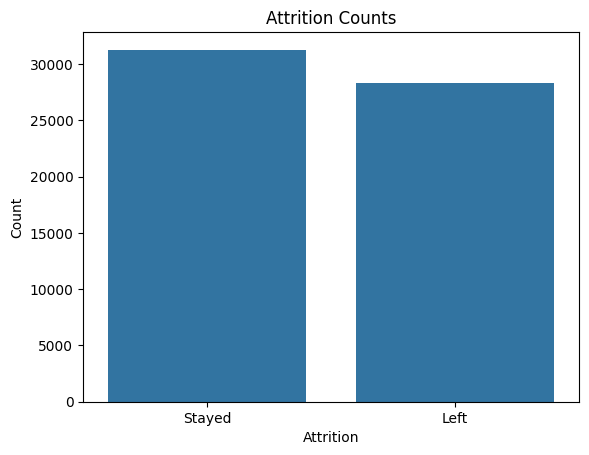

In [326]:
sns.countplot(x='Attrition', data=train)
plt.title('Attrition Counts')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

### **Distribution of Age by Attrition**

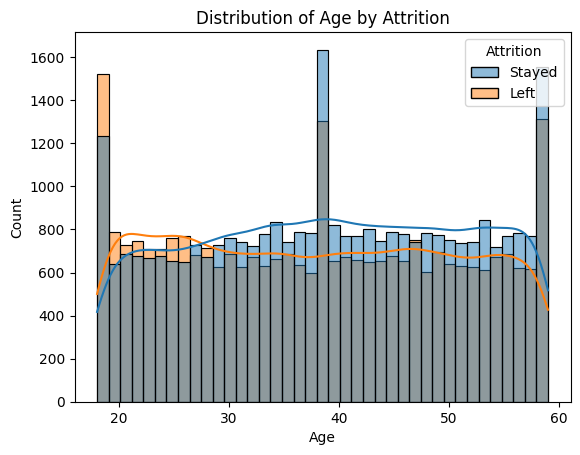

In [327]:
sns.histplot(data=train, x='Age', hue='Attrition', kde=True)
plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### **Attrition vs Job Satisfaction**

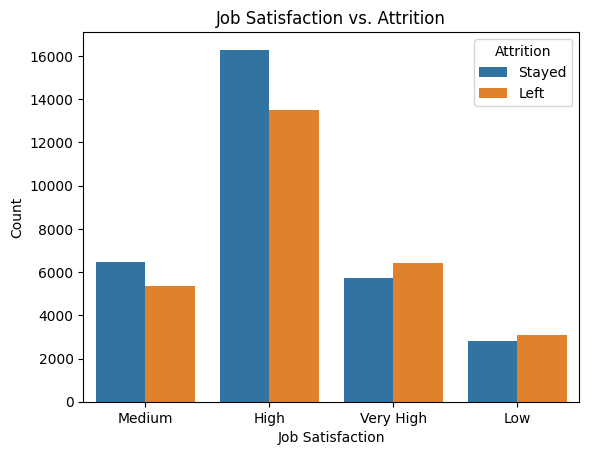

In [328]:
sns.countplot(x='Job Satisfaction', hue='Attrition', data=train)
plt.title('Job Satisfaction vs. Attrition')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

### **Year at company**

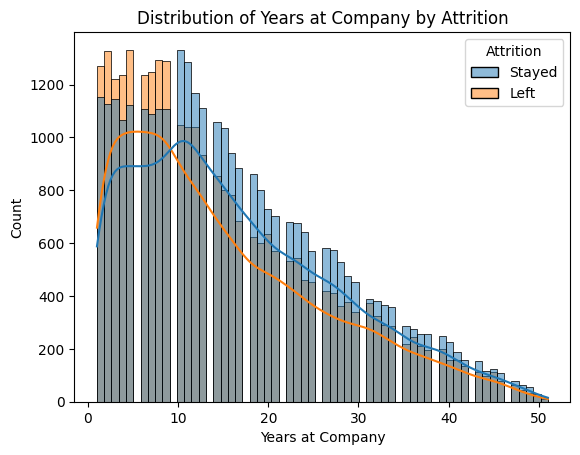

In [329]:
sns.histplot(data=train, x='Years at Company', hue='Attrition', kde=True)
plt.title('Distribution of Years at Company by Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.show()

### **Attrition vs Department**

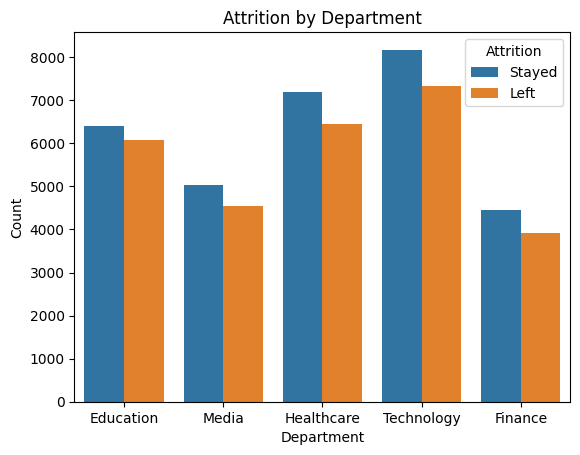

In [330]:
sns.countplot(x='Job Role', hue='Attrition', data=train)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

### **Attrition vs Monthly Income**

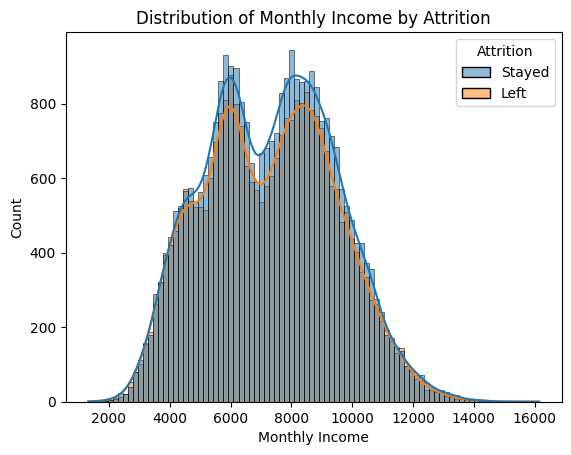

In [331]:
sns.histplot(data=train, x='Monthly Income', hue='Attrition', kde=True)
plt.title('Distribution of Monthly Income by Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

### **Correlation Heatmap**

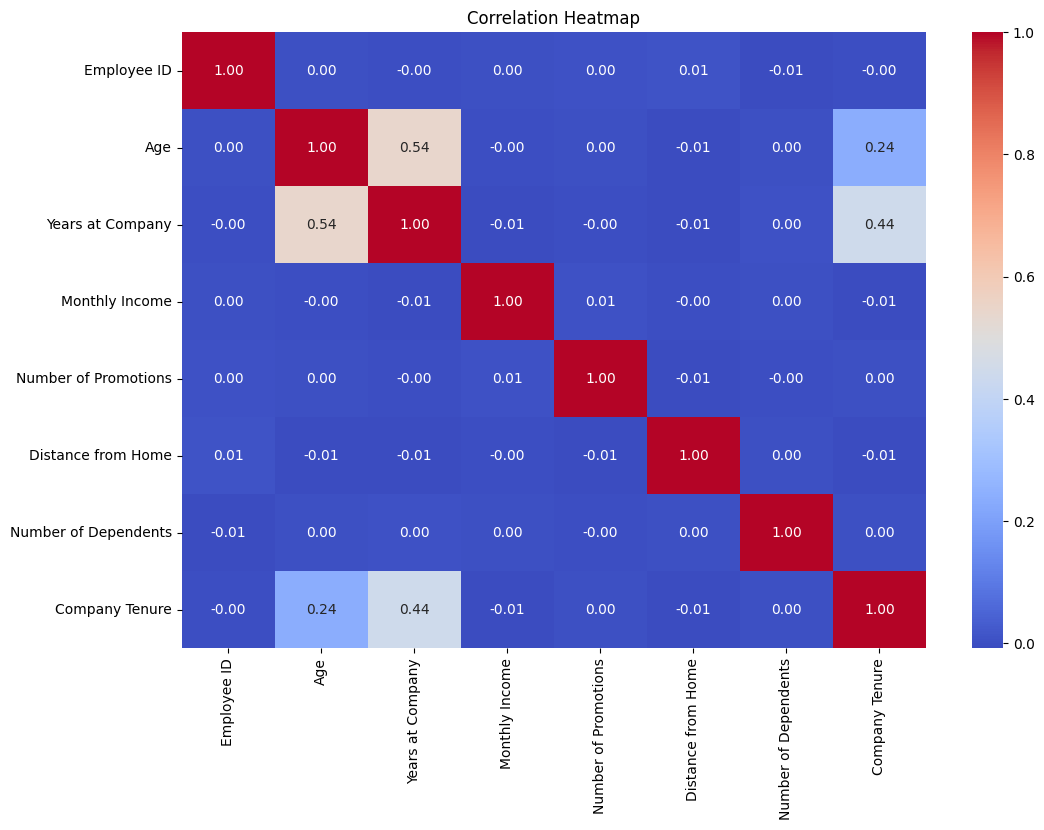

In [332]:
correlation_matrix = train.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### **Checking outliers**

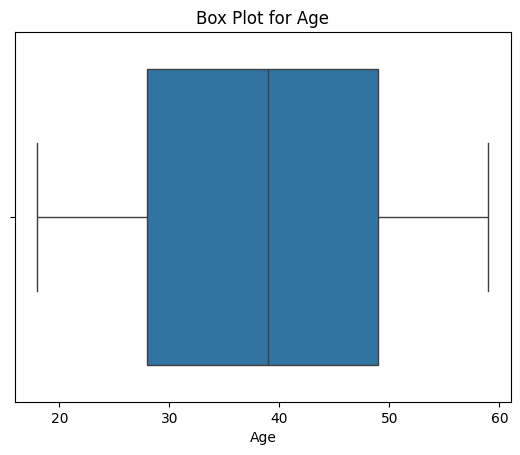

In [333]:
sns.boxplot(x='Age', data=train)
plt.title('Box Plot for Age')
plt.show()

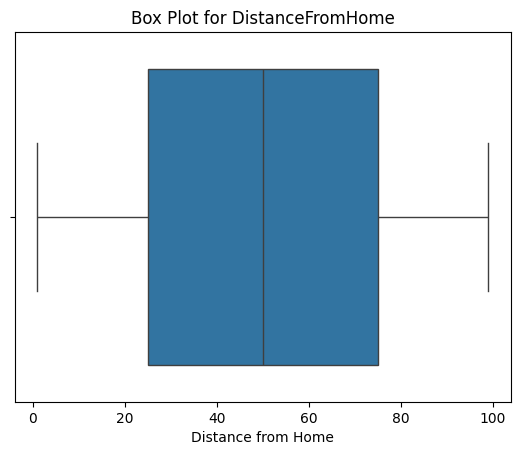

In [334]:
sns.boxplot(x='Distance from Home', data=train)
plt.title('Box Plot for DistanceFromHome')
plt.show()

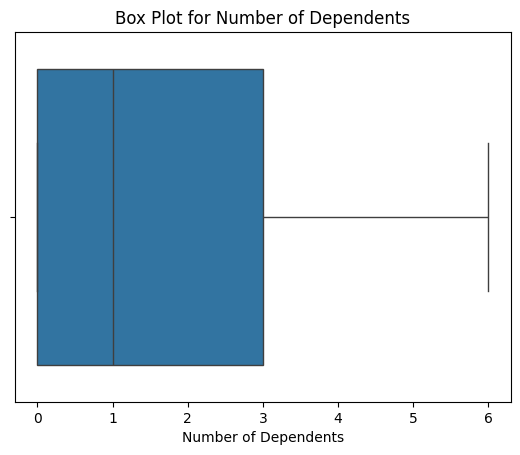

In [335]:
sns.boxplot(x='Number of Dependents', data=train)
plt.title('Box Plot for Number of Dependents')
plt.show()

## **Pre-Processing**

### **For Train dataset**

##### **Label Encoding**

In [336]:
train['Attrition']=train['Attrition'].map({
    "Left":0,
    "Stayed":1
})

##### **Feature & Target Split**

In [337]:
# Defining the target variable (dependent variable)
y_train = train['Attrition']

# Defining the independent variables (features)
X_train = train.drop('Attrition', axis=1)

##### **one-hot encoding**

In [338]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_train_encoded

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Gender_Male,Job Role_Finance,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,8410,31,19,5390,2,22,0,89,True,False,...,False,False,False,False,False,False,False,False,True,False
1,64756,59,4,5534,3,21,3,21,False,False,...,False,False,False,False,True,False,False,True,False,False
2,30257,24,10,8159,0,11,3,74,False,False,...,False,False,False,False,False,False,True,True,False,False
3,65791,36,7,3989,1,27,2,50,False,False,...,True,True,False,False,False,True,False,False,True,False
4,65026,56,41,4821,0,71,0,68,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,12,4414,1,66,2,35,False,False,...,True,False,False,True,False,False,True,False,False,True
59594,6266,18,4,8040,3,42,0,73,True,False,...,False,False,False,False,True,False,False,False,True,False
59595,54887,22,14,7944,0,34,2,29,False,False,...,True,False,True,False,False,True,False,False,True,False
59596,861,23,8,2931,0,62,0,9,True,False,...,False,False,False,False,False,True,False,True,False,False


##### **Scaling the data**

In [339]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)

In [340]:
X_train_scaled_df

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Gender_Male,Job Role_Finance,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,0.112877,0.317073,0.36,0.274658,0.50,0.214286,0.000000,0.690476,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.869230,1.000000,0.06,0.284366,0.75,0.204082,0.500000,0.150794,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.406137,0.146341,0.18,0.461336,0.00,0.102041,0.500000,0.571429,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.883123,0.439024,0.12,0.180206,0.25,0.265306,0.333333,0.380952,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.872854,0.926829,0.80,0.236297,0.00,0.714286,0.000000,0.523810,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,0.499268,0.780488,0.22,0.208859,0.25,0.663265,0.333333,0.261905,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
59594,0.084097,0.000000,0.06,0.453314,0.75,0.418367,0.000000,0.563492,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
59595,0.736755,0.097561,0.26,0.446842,0.00,0.336735,0.333333,0.214286,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
59596,0.011544,0.121951,0.14,0.108879,0.00,0.622449,0.000000,0.055556,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### **For Test dataset**

##### **Label Encoding**

In [341]:
test['Attrition']=test['Attrition'].map({
    "Left":0,
    "Stayed":1
})

##### **Feature & Target Split**

In [342]:
# Defining the target variable (dependent variable)
y_test = test['Attrition']

# Defining the independent variables (features)
X_test = test.drop('Attrition', axis=1)

##### **one-hot encoding**

In [343]:
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_test_encoded

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Gender_Male,Job Role_Finance,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,52685,36,13,8029,1,83,1,22,True,False,...,False,False,False,False,False,False,True,False,True,False
1,30585,35,7,4563,1,55,4,27,True,False,...,False,False,False,False,False,True,False,False,False,False
2,54656,50,7,5583,3,14,2,76,True,False,...,False,False,False,True,False,True,False,True,False,False
3,33442,58,44,5525,0,43,4,96,True,False,...,False,False,False,False,False,False,True,True,False,False
4,15667,39,24,4604,0,47,6,45,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,42,7830,0,40,0,60,False,False,...,False,False,False,False,False,False,True,False,True,False
14896,47175,30,15,3856,2,45,0,20,False,False,...,False,False,False,False,False,True,False,False,True,False
14897,12409,52,5,5654,0,4,4,7,True,False,...,True,False,False,False,False,True,False,False,False,False
14898,9554,18,4,5276,0,13,3,5,True,False,...,False,False,False,False,False,False,True,False,False,False


##### **Scaling the data**

In [344]:
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test_encoded)

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)

In [345]:
X_test_scaled_df

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Gender_Male,Job Role_Finance,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,0.707437,0.439024,0.24,0.491653,0.25,0.836735,0.166667,0.160,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.410657,0.414634,0.12,0.241165,0.25,0.551020,0.666667,0.200,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.733905,0.780488,0.12,0.314880,0.75,0.132653,0.333333,0.592,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.449024,0.975610,0.86,0.310689,0.00,0.428571,0.666667,0.752,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.210324,0.512195,0.46,0.244128,0.00,0.469388,1.000000,0.344,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,0.218059,0.926829,0.82,0.477271,0.00,0.397959,0.000000,0.464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
14896,0.633443,0.292683,0.28,0.190070,0.50,0.448980,0.000000,0.144,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14897,0.166573,0.829268,0.08,0.320012,0.00,0.030612,0.666667,0.040,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14898,0.128233,0.000000,0.06,0.292694,0.00,0.122449,0.500000,0.024,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## **Model Building**

In [346]:
logistic_model = LogisticRegression(random_state=42)

decision_tree_model = DecisionTreeClassifier(random_state=42)

random_forest_model = RandomForestClassifier(random_state=42)

### **Logistic Regression model**

In [347]:
logistic_model.fit(X_train_scaled_df, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled_df)

##### **Evaluation**

In [348]:
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_report = classification_report(y_test, logistic_predictions)

print("Logistic Regression Model Accuracy:", logistic_accuracy)
print("\nLogistic Regression Model Classification Report:")
print(logistic_report)

Logistic Regression Model Accuracy: 0.7551677852348994

Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      7032
           1       0.77      0.77      0.77      7868

    accuracy                           0.76     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.76      0.76      0.76     14900



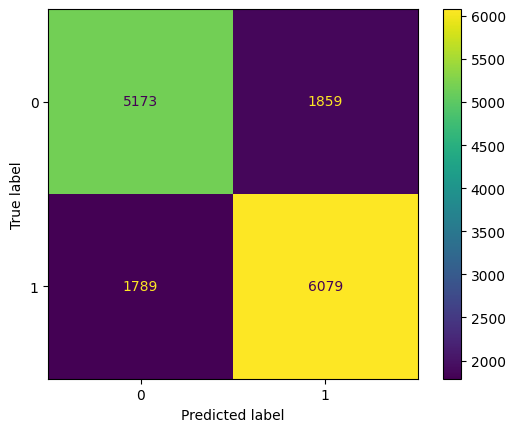

In [349]:
cm = confusion_matrix(y_test, logistic_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### **Decision Tree model**

In [350]:
decision_tree_model.fit(X_train_scaled_df, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled_df)

##### **Evaluation**

In [351]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_report = classification_report(y_test, decision_tree_predictions)

print("Decision Tree Model Accuracy:", decision_tree_accuracy)
print("\nDecision Tree Model Classification Report:")
print(decision_tree_report)

Decision Tree Model Accuracy: 0.6632214765100671

Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.65      7032
           1       0.68      0.68      0.68      7868

    accuracy                           0.66     14900
   macro avg       0.66      0.66      0.66     14900
weighted avg       0.66      0.66      0.66     14900



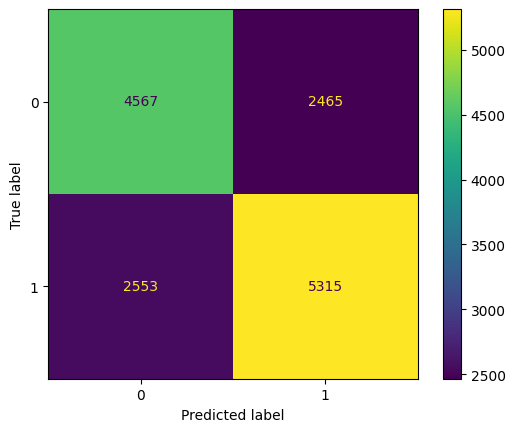

In [352]:
cm = confusion_matrix(y_test, decision_tree_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### **Random Forest model**

In [353]:
random_forest_model.fit(X_train_scaled_df, y_train)
random_forest_predictions = random_forest_model.predict(X_test_scaled_df)

##### **Evaluation**

In [354]:
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_report = classification_report(y_test, random_forest_predictions)

print("Random Forest Model Accuracy:", random_forest_accuracy)
print("\nRandom Forest Model Classification Report:")
print(random_forest_report)

Random Forest Model Accuracy: 0.7479865771812081

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      7032
           1       0.76      0.77      0.76      7868

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900



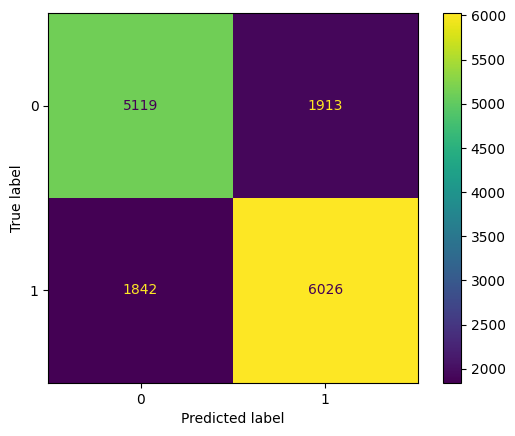

In [355]:
cm = confusion_matrix(y_test, random_forest_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### **XG Classifier**

In [356]:
model = XGBClassifier(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0.05,
    reg_lambda=1,
    scale_pos_weight=1,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
)

model.fit(X_train_scaled_df, y_train, verbose=False)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:52:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [357]:
xgb_predictions = model.predict(X_test_scaled_df)

##### **Evaluation**

In [358]:
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_report = classification_report(y_test, xgb_predictions)

print("XG Boost Model Accuracy:", xgb_accuracy)
print("\nXG Boost Classification Report:")
print(xgb_report)

XG Boost Model Accuracy: 0.7597986577181208

XG Boost Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      7032
           1       0.77      0.77      0.77      7868

    accuracy                           0.76     14900
   macro avg       0.76      0.76      0.76     14900
weighted avg       0.76      0.76      0.76     14900



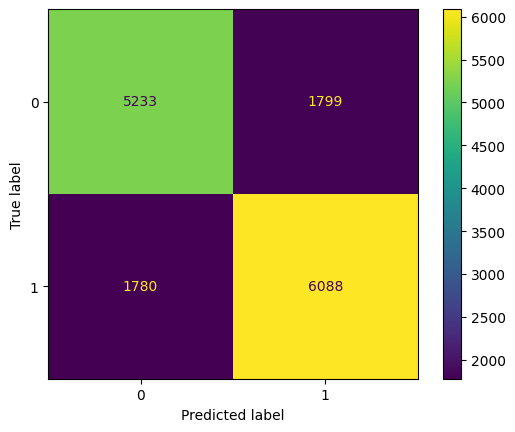

In [359]:
cm = confusion_matrix(y_test, xgb_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()